In [27]:
import random
import matplotlib.pyplot as plt
import pandas as pd  # Import pandas

In [28]:
POPULATION_SIZE = 200  # Kích thước quần thể
GENERATIONS = 200  # Số thế hệ

In [29]:
items = []  # Vật phẩm chứa weights và values
max_capacity = 0  # Maximum capacity
fitness_history = []  # Danh sách lưu trữ giá trị fitness của các cá thể tốt nhất qua từng thế hệ.

In [30]:
def get_user_input():
    global items, max_capacity, CROSSOVER_RATE, MUTATION_RATE

    # Nhập danh sách vật phẩm và sức chứa
    weights_str = input("Nhập danh sách trọng lượng (phân tách bằng dấu phẩy): ")
    values_str = input("Nhập danh sách giá trị (phân tách bằng dấu phẩy): ")
    max_capacity = int(input("Nhập sức chứa tối đa: "))

    # Nhập tỷ lệ lai ghép và đột biến
    CROSSOVER_RATE = float(input("Nhập tỷ lệ lai ghép (giá trị từ 0 đến 1): "))
    MUTATION_RATE = float(input("Nhập tỷ lệ đột biến (giá trị từ 0 đến 1): "))

    # Chuyển đổi đầu vào thành danh sách trọng lượng và giá trị
    weights = list(map(int, weights_str.split(",")))
    values = list(map(int, values_str.split(",")))
    items = list(zip(weights, values))

    return items, max_capacity, CROSSOVER_RATE, MUTATION_RATE


def get_info():
    print("\nThông tin bài toán:\n")
    stt = 1
    for weight, value in items:
        print(f"Vật phẩm {stt}: Weight = {weight}, Value = {value}")
        stt += 1
    print(f"\nMaximum capacity = {max_capacity}")
    print(f"Crossover rate = {CROSSOVER_RATE}")
    print(f"Mutation rate = {MUTATION_RATE}")


def fitness(individual):
    total_weight = sum(individual[i] * items[i][0] for i in range(len(items)))
    total_value = sum(individual[i] * items[i][1] for i in range(len(items)))
    return total_value if total_weight <= max_capacity else 0


def initialize_population(num_items):
    return [[random.randint(0, 1) for _ in range(num_items)] for _ in range(POPULATION_SIZE)]


def select_population(population):
    sorted_population = sorted(population, key=lambda x: fitness(x), reverse=True)
    return sorted_population[:POPULATION_SIZE]


def crossover(parent1, parent2):
    if len(parent1) <= 1 or len(parent2) <= 1:
        return parent1, parent2
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2


def mutate(individual):
    for i in range(len(individual)):
        if random.random() < MUTATION_RATE:
            individual[i] = 1 - individual[i]
    return individual


def genetic_algorithm():
    global fitness_history

    population = initialize_population(len(items))
    best_individual = max(population, key=lambda ind: fitness(ind))

    # DataFrame để lưu lịch sử fitness
    fitness_df = pd.DataFrame(columns=["Generation", "Best_Fitness", "Mean_Fitness"])

    best_fitness_history = []  # Lưu trữ fitness tốt nhất
    mean_fitness_history = []  # Lưu trữ fitness trung bình

    for gen in range(GENERATIONS):
        selected_population = select_population(population)

        offspring = []
        for i in range(0, len(selected_population), 2):
            if random.random() < CROSSOVER_RATE and i + 1 < len(selected_population):
                child1, child2 = crossover(selected_population[i], selected_population[i + 1])
                offspring.extend([child1, child2])
            else:
                offspring.extend([selected_population[i], selected_population[i + 1]])

        offspring = [mutate(ind) for ind in offspring]

        population.extend(offspring)

        # Cắt tỉa quần thể để đảm bảo kích thước không vượt quá POPULATION_SIZE
        population = sorted(population, key=lambda ind: fitness(ind), reverse=True)
        population = population[:POPULATION_SIZE]

        current_best = max(population, key=lambda ind: fitness(ind))
        best_fitness = fitness(current_best)
        best_fitness_history.append(best_fitness)

        # Tính fitness trung bình
        mean_fitness = sum(fitness(ind) for ind in population) / len(population)
        mean_fitness_history.append(mean_fitness)

        # Lưu dữ liệu vào DataFrame
        new_row = pd.DataFrame([{
            "Generation": gen + 1,
            "Best_Fitness": best_fitness,
            "Mean_Fitness": mean_fitness
        }])
        fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)

        if best_fitness > fitness(best_individual):
            best_individual = current_best

    return best_individual, fitness(best_individual), best_fitness_history, mean_fitness_history, fitness_df


In [31]:
# Main Program
items, max_capacity, CROSSOVER_RATE, MUTATION_RATE = get_user_input()
get_info()


Thông tin bài toán:

Vật phẩm 1: Weight = 879, Value = 3083
Vật phẩm 2: Weight = 3946, Value = 836
Vật phẩm 3: Weight = 3736, Value = 3615
Vật phẩm 4: Weight = 2324, Value = 3391
Vật phẩm 5: Weight = 2104, Value = 1409
Vật phẩm 6: Weight = 1971, Value = 3999
Vật phẩm 7: Weight = 3252, Value = 1829
Vật phẩm 8: Weight = 3712, Value = 1216
Vật phẩm 9: Weight = 2493, Value = 3220
Vật phẩm 10: Weight = 2780, Value = 278
Vật phẩm 11: Weight = 1350, Value = 774
Vật phẩm 12: Weight = 1463, Value = 3602
Vật phẩm 13: Weight = 3868, Value = 158
Vật phẩm 14: Weight = 2466, Value = 761
Vật phẩm 15: Weight = 191, Value = 3771
Vật phẩm 16: Weight = 1960, Value = 288
Vật phẩm 17: Weight = 2347, Value = 797
Vật phẩm 18: Weight = 343, Value = 1953
Vật phẩm 19: Weight = 2348, Value = 3947
Vật phẩm 20: Weight = 2902, Value = 2882
Vật phẩm 21: Weight = 2840, Value = 3993
Vật phẩm 22: Weight = 3047, Value = 3179
Vật phẩm 23: Weight = 77, Value = 1353
Vật phẩm 24: Weight = 2390, Value = 654
Vật phẩm 25: Wei

In [47]:
best_solution, best_fitness, best_fitness_history, mean_fitness_history, fitness_df = genetic_algorithm()

# In kết quả
print("\nGiải pháp tốt nhất tìm được:")
print(f"Chromosome: {best_solution}")
print(f"Fitness: {best_fitness}")

C:\Users\Admin\AppData\Local\Temp\ipykernel_21612\1669037851.py:108: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)



Giải pháp tốt nhất tìm được:
Chromosome: [1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0]
Fitness: 78765


In [48]:
fitness_df

,Generation,Best_Fitness,Mean_Fitness
0,1,61976,46112.430
1,2,62999,49766.265
2,3,62999,52764.425
3,4,63656,55255.140
4,5,64081,57222.825
...,...,...,...
195,196,78765,78765.000
196,197,78765,78765.000
197,198,78765,78765.000
198,199,78765,78765.000


In [41]:
fitness_df = fitness_df.iloc[:, 1:]

In [42]:
fitness_df

,Best_Fitness,Mean_Fitness
0,61251,46041.355
1,61302,48868.180
2,69114,51830.820
3,69114,54526.330
4,69114,56640.350
...,...,...
195,79009,79009.000
196,79009,79009.000
197,79009,79009.000
198,79009,79009.000


In [39]:
fitness_df.describe()

,Mean_Fitness
count,200.000000
mean,77299.273375
std,5298.189472
min,46041.355000
25%,79009.000000
50%,79009.000000
75%,79009.000000
max,79009.000000


In [40]:
fitness_df.dtypes

Generation       object
Best_Fitness     object
Mean_Fitness    float64
dtype: object

Default: 
- Crossover rate = 0.8
- Mutation rate = 0.02

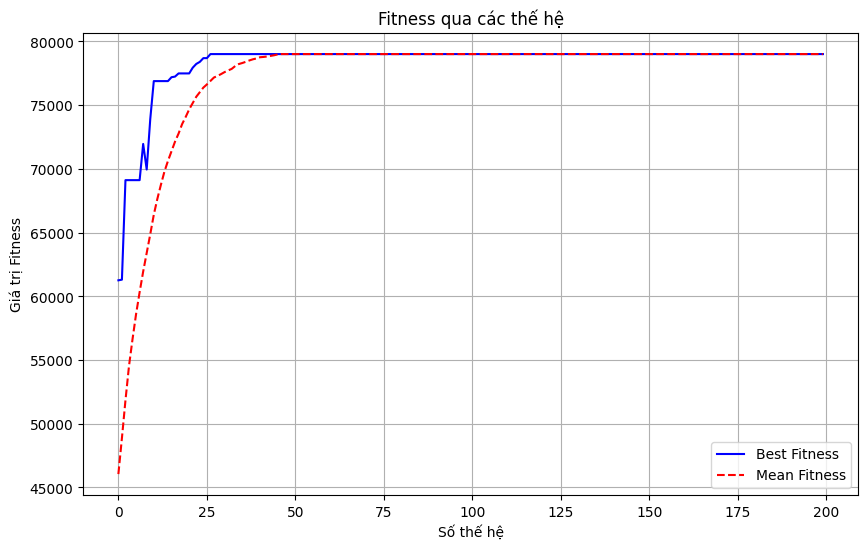

In [38]:
# Hiển thị biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(range(GENERATIONS), best_fitness_history, label='Best Fitness', color='blue')
plt.plot(range(GENERATIONS), mean_fitness_history, label='Mean Fitness', color='red', linestyle='--')

plt.title('Fitness qua các thế hệ')
plt.xlabel('Số thế hệ')
plt.ylabel('Giá trị Fitness')
plt.legend()
plt.grid(True)
plt.show()

- Hội tụ sớm nên hội tụ ở 50%-70% thế hệ 
- Giai đoạn ban đầu: Khoảng cách giữa Mean Fitness và Best Fitness nên lớn, vì điều này biểu thị sự đa dạng trong quần thể
- Giai đoạn hội tụ: Khi quần thể tiến gần tới trạng thái hội tụ, khoảng cách này sẽ giảm tự nhiên. Tuy nhiên, để đảm bảo quần thể không bị "đồng nhất" hoàn toàn, nên duy trì một khoảng cách nhỏ (Mean Fitness ≠ Best Fitness).
Nếu khoảng cách này = 0, điều đó báo hiệu mất đa dạng hoàn toàn.
- Mean Fitness nên đạt khoảng 90% - 95% giá trị Best Fitness trước khi hội tụ là tốt.

- CROSSOVER_RATE = 0.9
- MUTATION_RATE = 0.1 

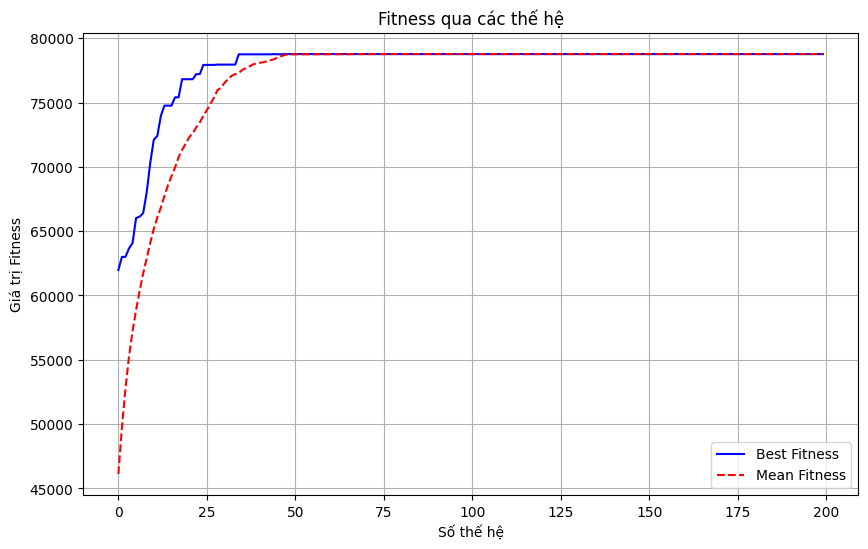

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(range(GENERATIONS), best_fitness_history, label='Best Fitness', color='blue')
plt.plot(range(GENERATIONS), mean_fitness_history, label='Mean Fitness', color='red', linestyle='--')

plt.title('Fitness qua các thế hệ')
plt.xlabel('Số thế hệ')
plt.ylabel('Giá trị Fitness')
plt.legend()
plt.grid(True)
plt.show()

Cực đại hóa: CROSSOVER_RATE và MUTATION_RATE nhưng chỉ cải thiện được một chút


Giảm CROSSOVER_RATE cực đại MUTATION_RATE

- CROSSOVER_RATE = 0.6
- MUTATION_RATE = 0.1 

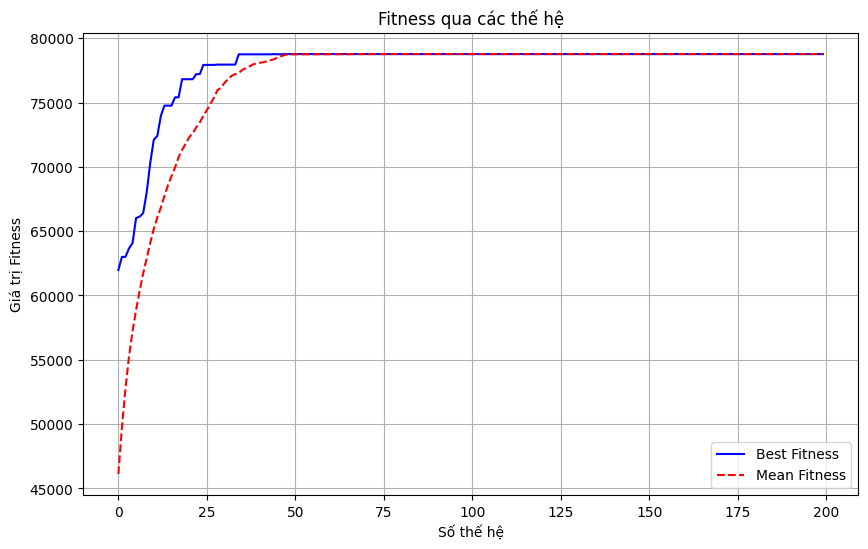

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(range(GENERATIONS), best_fitness_history, label='Best Fitness', color='blue')
plt.plot(range(GENERATIONS), mean_fitness_history, label='Mean Fitness', color='red', linestyle='--')

plt.title('Fitness qua các thế hệ')
plt.xlabel('Số thế hệ')
plt.ylabel('Giá trị Fitness')
plt.legend()
plt.grid(True)
plt.show()

Đụ má chịu nó đéo thay đổi